# Data Import

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [14]:
df = pd.read_json('../data_collection/data/posts.json')
df.head()

,amplification,clicks,clicks_unique,comments,created_time,engagements,id,impressions,impressions_organic,impressions_organic_unique,...,promotion_amount,reactions_haha,reactions_like,reactions_love,reactions_sorry,shares,time,type,visual_style,weekday
0,paid,696,538,10,2018-12-08 05:00:01,801,1.038028e+30,12299,9077,6601,...,0,4,276,18,1,21,13,photo,,6
1,paid,323,286,1,2018-12-07 09:00:01,313,1.038028e+30,16188,4060,2942,...,0,0,29,2,0,3,17,video_direct_response,,5
2,paid,459,301,6,2018-12-06 09:00:02,362,1.038028e+30,10115,2679,1961,...,0,0,61,5,0,11,17,video_inline,,4
3,organic,42,37,0,2018-12-05 11:12:12,53,1.038028e+30,4701,4853,3365,...,0,0,15,1,0,0,19,photo,,3
4,organic,507,315,4,2018-12-03 03:35:16,346,1.038028e+30,9623,9880,5196,...,0,0,32,9,0,10,11,album,,1


# Data Cleaning

In [15]:
#messages
df['message'] = df['message'].fillna('')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 30 columns):
amplification                    708 non-null object
clicks                           708 non-null int64
clicks_unique                    708 non-null int64
comments                         708 non-null int64
created_time                     708 non-null datetime64[ns]
engagements                      708 non-null int64
id                               708 non-null float64
impressions                      708 non-null int64
impressions_organic              708 non-null int64
impressions_organic_unique       708 non-null int64
impressions_paid                 708 non-null int64
impressions_paid_unique          708 non-null int64
intent                           708 non-null object
is_sharing_required_for_promo    708 non-null bool
last_post_time_diff              708 non-null int64
media_src_url                    708 non-null object
media_url                        708 non-null obje

# Encoding

In [17]:
cols_to_encode = ['amplification', 'intent', 'type']
encoders = {}

for i in range(0, len(cols_to_encode)):
    col = cols_to_encode[i]
    encoders[col] = LabelEncoder()
    df[col + '_encoded'] = encoders[col].fit_transform(df[col])


In [159]:
df.head()

,amplification,clicks,clicks_unique,comments,created_time,engagements,id,impressions,impressions_organic,impressions_organic_unique,...,visual_style,weekday,amplification_encoded,intent_encoded,type_encoded,click_rate,reaction_rate,engagement_rate,comment_rate,share_rate
0,paid,696,538,10,2018-12-08 05:00:01,801,1.038028e+30,12299,9077,6601,...,,6,1,0,6,3.308530,1.838755,4.925896,0.061497,0.129143
1,paid,323,286,1,2018-12-07 09:00:01,313,1.038028e+30,16188,4060,2942,...,,5,1,0,10,1.520468,0.164806,1.664009,0.005316,0.015949
2,paid,459,301,6,2018-12-06 09:00:02,362,1.038028e+30,10115,2679,1961,...,,4,1,0,11,3.494312,0.766195,4.202461,0.069654,0.127699
3,organic,42,37,0,2018-12-05 11:12:12,53,1.038028e+30,4701,4853,3365,...,,3,0,0,6,1.099554,0.475483,1.575037,0.000000,0.000000
4,organic,507,315,4,2018-12-03 03:35:16,346,1.038028e+30,9623,9880,5196,...,,1,0,0,0,6.062356,0.789069,6.658968,0.076982,0.192456


# Word Processing on "Message"

In [160]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Francis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Francis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Francis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences

#tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['message'])
encoded_docs = tokenizer.texts_to_sequences(df['message'])
padded_docs = pad_sequences(encoded_docs, maxlen=4, padding='post')


# Candidate Features / Target

In [23]:
#formulate target
df['click_rate'] = df['clicks_unique'] / (df['impressions_organic_unique'] + df['impressions_paid_unique']) * 100
df['reaction_rate'] = (df['reactions_haha'] + df['reactions_like'] + df['reactions_love'] + df['reactions_sorry']) / (df['impressions_organic_unique'] + df['impressions_paid_unique']) * 100
df['engagement_rate'] = df['engagements'] / (df['impressions_organic_unique'] + df['impressions_paid_unique']) * 100
df['comment_rate'] = df['comments'] / (df['impressions_organic_unique'] + df['impressions_paid_unique']) * 100
df['share_rate'] = df['shares'] / (df['impressions_organic_unique'] + df['impressions_paid_unique']) * 100

df['type'].unique()

array(['photo', 'video_direct_response', 'video_inline', 'album',
       'visual_poll', 'rich_media', 'cover_photo', 'animated_image_video',
       'event', 'new_album', 'text', 'offer_view_live_countdown'],
      dtype=object)

In [24]:
#drop na
#some targets became nan
df.dropna(inplace=True)

In [25]:
targets = ['click_rate', 'reaction_rate', 'engagement_rate', 'comment_rate', 'share_rate']
y_candidates = df[targets]
y_candidates.head()

,click_rate,reaction_rate,engagement_rate,comment_rate,share_rate
0,3.308530,1.838755,4.925896,0.061497,0.129143
1,1.520468,0.164806,1.664009,0.005316,0.015949
2,3.494312,0.766195,4.202461,0.069654,0.127699
3,1.099554,0.475483,1.575037,0.000000,0.000000
4,6.062356,0.789069,6.658968,0.076982,0.192456


In [26]:
df.columns

Index(['amplification', 'clicks', 'clicks_unique', 'comments', 'created_time',
       'engagements', 'id', 'impressions', 'impressions_organic',
       'impressions_organic_unique', 'impressions_paid',
       'impressions_paid_unique', 'intent', 'is_sharing_required_for_promo',
       'last_post_time_diff', 'media_src_url', 'media_url', 'message',
       'message_length', 'num_creatives', 'promotion_amount', 'reactions_haha',
       'reactions_like', 'reactions_love', 'reactions_sorry', 'shares', 'time',
       'type', 'visual_style', 'weekday', 'amplification_encoded',
       'intent_encoded', 'type_encoded', 'click_rate', 'reaction_rate',
       'engagement_rate', 'comment_rate', 'share_rate'],
      dtype='object')

In [27]:
features = [
    'amplification_encoded', 
    'intent_encoded', 
    'type_encoded', 
#     'last_post_time_diff',
    'time', 
    'weekday',
    'num_creatives',
    'message_length'
]
X = df[features]
X.head()

,amplification_encoded,intent_encoded,type_encoded,time,weekday,num_creatives,message_length
0,1,0,6,13,6,1,383
1,1,0,10,17,5,1,280
2,1,0,11,17,4,1,259
3,0,0,6,19,3,1,311
4,0,0,0,11,1,4,271


In [28]:
pd.concat([X, y_candidates], axis=1).head()

,amplification_encoded,intent_encoded,type_encoded,time,weekday,num_creatives,message_length,click_rate,reaction_rate,engagement_rate,comment_rate,share_rate
0,1,0,6,13,6,1,383,3.308530,1.838755,4.925896,0.061497,0.129143
1,1,0,10,17,5,1,280,1.520468,0.164806,1.664009,0.005316,0.015949
2,1,0,11,17,4,1,259,3.494312,0.766195,4.202461,0.069654,0.127699
3,0,0,6,19,3,1,311,1.099554,0.475483,1.575037,0.000000,0.000000
4,0,0,0,11,1,4,271,6.062356,0.789069,6.658968,0.076982,0.192456


In [158]:
# sns.pairplot(pd.concat([X, y_candidates], axis=1))

# Train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y = y_candidates['share_rate']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
Z_train = scaler.transform(X_train)
Z_test = scaler.transform(X_test)


C:\Users\Francis\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Francis\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\Francis\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  


In [33]:
Z_train[0]

array([ 1.79343746,  0.        ,  1.50660048,  0.31474141, -0.59552442,
       -0.32271252,  0.63350402])

# Model Engineering

In [204]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding

In [205]:
len(X.columns)
Z_train.shape

(565, 7)

In [123]:
model = Sequential()
model.add(Dense(2, input_shape=(len(X.columns),), activation='relu'))
model.add(Dense(2, input_shape=(len(X.columns),), activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 2)                 16        
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [124]:
from keras.callbacks import TensorBoard
from keras.optimizers import Adam, RMSprop, SGD
import time

optimizer = Adam(lr=1e-3)

batch_size = 128

tensorboard = TensorBoard(log_dir='./logs/fb_engagement/%d' % time.time())

model.compile(loss='mae',
              optimizer=optimizer,
              metrics=['mae'])

In [127]:

epochs = 20

history = model.fit(Z_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[],
                    validation_data=(X_test, y_test))

Train on 565 samples, validate on 142 samples
Epoch 1/20
565/565 [==============================] - 0s 76us/step - loss: 0.1344 - mean_absolute_error: 0.1344 - val_loss: 0.0924 - val_mean_absolute_error: 0.0924
Epoch 2/20
565/565 [==============================] - 0s 76us/step - loss: 0.1344 - mean_absolute_error: 0.1344 - val_loss: 0.0924 - val_mean_absolute_error: 0.0924
Epoch 3/20
565/565 [==============================] - 0s 76us/step - loss: 0.1343 - mean_absolute_error: 0.1343 - val_loss: 0.0924 - val_mean_absolute_error: 0.0924
Epoch 4/20
565/565 [==============================] - 0s 74us/step - loss: 0.1343 - mean_absolute_error: 0.1343 - val_loss: 0.0924 - val_mean_absolute_error: 0.0924
Epoch 5/20
565/565 [==============================] - 0s 79us/step - loss: 0.1342 - mean_absolute_error: 0.1342 - val_loss: 0.0924 - val_mean_absolute_error: 0.0924
Epoch 6/20
565/565 [==============================] - 0s 79us/step - loss: 0.1342 - mean_absolute_error: 0.1342 - val_loss: 0.092

In [128]:
y_pred = model.predict(Z_test)

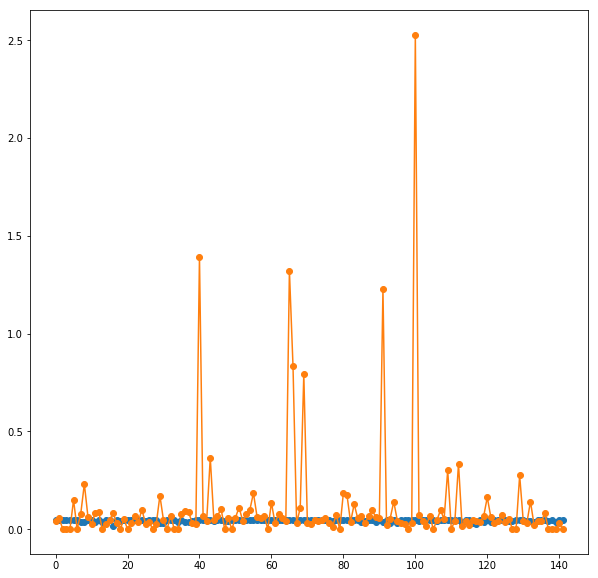

In [153]:
y_truth = pd.DataFrame(y_test).reset_index()['share_rate']
df_truth_pred = pd.DataFrame(y_truth)
df_truth_pred['pred'] = y_pred

fig, ax = plt.subplots(figsize=[10, 10])

ax.plot(df_truth_pred.pred, marker='o')
ax.plot(df_truth_pred.share_rate, marker='o')

In [158]:
df.iloc[y_test[(y_test > 0.5)].index]

,amplification,clicks,clicks_unique,comments,created_time,engagements,id,impressions,impressions_organic,impressions_organic_unique,...,visual_style,weekday,amplification_encoded,intent_encoded,type_encoded,click_rate,reaction_rate,engagement_rate,comment_rate,share_rate
174,paid,2225,1326,441,2018-04-10 09:00:01,1619,1.038028e+30,42013,28276,16866,...,,2,1,0,6,4.667371,2.104893,5.698698,1.552270,1.390356
259,organic,239,166,90,2017-12-23 05:02:28,228,1.038028e+30,5059,5059,3407,...,,6,0,0,11,4.872322,3.639566,6.692104,2.641620,1.320810
690,paid,992,638,226,2016-12-23 09:00:00,781,1.038028e+30,25090,9855,6763,...,,5,1,0,6,4.368068,2.088183,5.347118,1.547309,0.746269
86,paid,4049,2780,438,2018-08-21 09:00:01,3090,1.038028e+30,87028,29825,16904,...,,2,1,0,6,4.965616,1.361079,5.519336,0.782352,0.791283
705,paid,698,464,201,2016-12-10 04:00:01,625,1.038028e+30,19049,9173,6380,...,,6,1,0,6,4.364594,2.774904,5.879033,1.890697,1.015897
60,organic,1287,832,390,2018-09-22 05:00:00,974,1.038028e+30,23925,23930,14090,...,,6,0,0,6,5.904897,3.087296,6.912704,2.767921,2.526615


In [148]:
df_truth_pred

,share_rate,pred
0,0.042882,0.045100
1,0.055218,0.045100
2,0.000000,0.045100
3,0.000000,0.045100
4,0.000000,0.045100
5,0.148588,0.045100
6,0.000000,0.045100
7,0.078370,0.038603
8,0.230725,0.037067
9,0.063271,0.045100


In [170]:
# model.save('./model3.hdf5')